<a href="https://colab.research.google.com/github/Shorouk99/image_lassification_models/blob/main/fashion_mnist_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training CNN model on Fashion MNIST dataset using Keras
Training this model was developed by guidance from these tutorials ([1](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/), [2](https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/))

Created on August 5, 2021 by Shorouk Magdy for the ARL Online Technical Mission

In [ ]:
# Importing packages
# matplotlib and numpy are only used to visualize the results of the training
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import SGD

#Loading and preparing the data

In [ ]:
def load_data():
  # Loading the dataset
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()

  # Adding the channel dimension, which is 1 (graysacale images)
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # One-hot encoding the classes
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

In [ ]:
def prep_data(train_data, test_data):
  # Normalizing pixel values
  train_norm = train_data.astype('float32')
  test_norm = test_data.astype('float32')
  train_norm /= 255.0
  test_norm /= 255.0

  return train_norm, test_norm

# Defining and compiling the model

In [ ]:
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(BatchNormalization(axis=-1))

  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.35))

  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization(axis=-1))
  model.add(Dropout(0.25))
  
  model.add(Dense(10, activation='softmax'))

  opt = SGD(learning_rate=0.02, momentum=0.7)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

#Fitting and evaluating the model

In [ ]:
def fit_model(X, Y, x_test, y_test):
  trainX, trainY, testX, testY = X, Y, x_test, y_test
  model = define_model()
  history = model.fit(trainX, trainY, epochs=25, batch_size=32, validation_data=(testX, testY))

  _,acc = model.evaluate(testX, testY, verbose=0)
  print('Accuracy = %.3f' %(acc*100.0))
  return history

#Running and plotting the learning curve

In [ ]:
# Plotting the learning curves
def plot_performance(history):
  plt.style.use('ggplot')
  plt.figure()
  plt.plot(np.arange(0,25), history.history['loss'], label='Training loss')
  plt.plot(np.arange(0,25), history.history['accuracy'], label='Training accuracy')
  plt.plot(np.arange(0,25), history.history['val_loss'], label='Validation loss')
  plt.plot(np.arange(0,25), history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel ('Epoch')
  plt.ylabel('Accuracy / Loss')
  plt.legend(loc='lower left')
  plt.title('Training Loss and Accuracy')
  plt.show()

In [ ]:
def run_model():
  trainX, trainY, testX, testY = load_data()
  trainX, testX = prep_data(trainX, testX)
  history = fit_model(trainX, trainY, testX, testY)
  plot_performance(history)

Epoch 1/25
1875/1875 [==============================] - 402s 214ms/step - loss: 0.5174 - accuracy: 0.8166 - val_loss: 0.3142 - val_accuracy: 0.8873
Epoch 2/25
1875/1875 [==============================] - 401s 214ms/step - loss: 0.2971 - accuracy: 0.8931 - val_loss: 0.2651 - val_accuracy: 0.9013
Epoch 3/25
1875/1875 [==============================] - 399s 213ms/step - loss: 0.2586 - accuracy: 0.9057 - val_loss: 0.2628 - val_accuracy: 0.9025
Epoch 4/25
1875/1875 [==============================] - 397s 212ms/step - loss: 0.2196 - accuracy: 0.9187 - val_loss: 0.3435 - val_accuracy: 0.8971
Epoch 5/25
1875/1875 [==============================] - 396s 211ms/step - loss: 0.2048 - accuracy: 0.9242 - val_loss: 0.2264 - val_accuracy: 0.9203
Epoch 6/25
1875/1875 [==============================] - 396s 211ms/step - loss: 0.1821 - accuracy: 0.9325 - val_loss: 0.2267 - val_accuracy: 0.9187
Epoch 7/25
1875/1875 [==============================] - 395s 211ms/step - loss: 0.1645 - accuracy: 0.9390 - val_

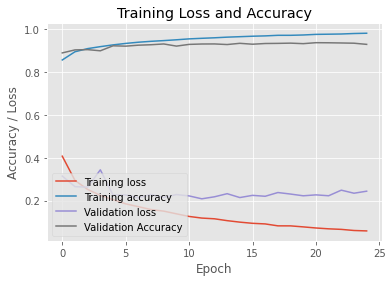

In [ ]:
run_model()